In [238]:
import ccxt
import pandas as pd
import numpy as np

# Initialize Binance
exchange = ccxt.binance()
symbol = 'BTC/USDT'
timeframe = '15m'  # hourly candles
limit = 10000  # number of candles to fetch

# Fetch OHLCV data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)

# Convert to DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)


In [239]:
"""# ===============================
# 2. Calculate RSI
# ===============================
import ta
df["RSI"] = ta.momentum.RSIIndicator(df["close"], window=14).rsi()
"""

'# ===============================\n# 2. Calculate RSI\n# ===============================\nimport ta\ndf["RSI"] = ta.momentum.RSIIndicator(df["close"], window=14).rsi()\n'

In [240]:
"""# ===============================
# 3. MACD Calculation
# ===============================
df["EMA12"] = df["close"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["Histogram"] = df["MACD"] - df["Signal"]
"""

'# ===============================\n# 3. MACD Calculation\n# ===============================\ndf["EMA12"] = df["close"].ewm(span=12, adjust=False).mean()\ndf["EMA26"] = df["close"].ewm(span=26, adjust=False).mean()\ndf["MACD"] = df["EMA12"] - df["EMA26"]\ndf["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()\ndf["Histogram"] = df["MACD"] - df["Signal"]\n'

In [241]:
"""import talib
df["DEMA9"] = talib.DEMA(df["close"].values, timeperiod=9)"""

'import talib\ndf["DEMA9"] = talib.DEMA(df["close"].values, timeperiod=9)'

In [242]:
"""# ------------------------------
# 2. Calculate SMA (3 closes)
# ------------------------------
sma_window = 3
df['SMA'] = ta.trend.sma_indicator(df['close'], window=sma_window)
"""

"# ------------------------------\n# 2. Calculate SMA (3 closes)\n# ------------------------------\nsma_window = 3\ndf['SMA'] = ta.trend.sma_indicator(df['close'], window=sma_window)\n"

In [243]:
"""# ------------------------------
# 2. Compute TSI
# ------------------------------
def compute_tsi(close, r1=25, r2=13):
    delta = close.diff()
    ema1 = delta.ewm(span=r1, adjust=False).mean()
    ema2 = ema1.ewm(span=r2, adjust=False).mean()

    abs_delta = delta.abs()
    abs_ema1 = abs_delta.ewm(span=r1, adjust=False).mean()
    abs_ema2 = abs_ema1.ewm(span=r2, adjust=False).mean()

    tsi = 100 * (ema2 / abs_ema2)
    return tsi

df['TSI'] = compute_tsi(df['close'])
"""

"# ------------------------------\n# 2. Compute TSI\n# ------------------------------\ndef compute_tsi(close, r1=25, r2=13):\n    delta = close.diff()\n    ema1 = delta.ewm(span=r1, adjust=False).mean()\n    ema2 = ema1.ewm(span=r2, adjust=False).mean()\n\n    abs_delta = delta.abs()\n    abs_ema1 = abs_delta.ewm(span=r1, adjust=False).mean()\n    abs_ema2 = abs_ema1.ewm(span=r2, adjust=False).mean()\n\n    tsi = 100 * (ema2 / abs_ema2)\n    return tsi\n\ndf['TSI'] = compute_tsi(df['close'])\n"

In [244]:
"""# ========================
# 2. Stochastic Oscillator
# ========================
period = 14
smooth_k = 3
smooth_d = 3

lowest_low = df["low"].rolling(period).min()
highest_high = df["high"].rolling(period).max()

df["%K"] = 100 * (df["close"] - lowest_low) / (highest_high - lowest_low)
df["%K"] = df["%K"].rolling(smooth_k).mean()
df["%D"] = df["%K"].rolling(smooth_d).mean()
"""

'# ========================\n# 2. Stochastic Oscillator\n# ========================\nperiod = 14\nsmooth_k = 3\nsmooth_d = 3\n\nlowest_low = df["low"].rolling(period).min()\nhighest_high = df["high"].rolling(period).max()\n\ndf["%K"] = 100 * (df["close"] - lowest_low) / (highest_high - lowest_low)\ndf["%K"] = df["%K"].rolling(smooth_k).mean()\ndf["%D"] = df["%K"].rolling(smooth_d).mean()\n'

In [245]:
import ta  # pip install ta
import talib  # optional but used earlier; if missing remove DEMA or use pandas ewm

def add_features(df):
    df = df.copy()
    # ensure columns lower-case/consistent
    # expect df to contain 'open','high','low','close','volume' (case-insensitive)
    df.columns = [c.lower() for c in df.columns]

    # basic indicators (your current set)
    df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()
    df['ema12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['ema26'] = df['close'].ewm(span=26, adjust=False).mean()
    df['macd'] = df['ema12'] - df['ema26']
    df['signal'] = df['macd'].ewm(span=9, adjust=False).mean()
    df['histogram'] = df['macd'] - df['signal']

    # DEMA (if talib available)
    try:
        df['dema9'] = talib.DEMA(df['close'].values, timeperiod=9)
    except Exception:
        df['dema9'] = df['close'].ewm(span=9).mean()  # fallback

    df['sma3'] = ta.trend.sma_indicator(df['close'], window=3)

    # TSI
    def compute_tsi(close, r1=25, r2=13):
        delta = close.diff()
        ema1 = delta.ewm(span=r1, adjust=False).mean()
        ema2 = ema1.ewm(span=r2, adjust=False).mean()
        abs_delta = delta.abs()
        abs_ema1 = abs_delta.ewm(span=r1, adjust=False).mean()
        abs_ema2 = abs_ema1.ewm(span=r2, adjust=False).mean()
        tsi = 100 * (ema2 / (abs_ema2.replace(0, np.nan)))
        return tsi.fillna(0)
    df['tsi'] = compute_tsi(df['close'])

    # Stochastic %K and %D
    period = 14; smooth_k = 3; smooth_d = 3
    lowest_low = df['low'].rolling(period).min()
    highest_high = df['high'].rolling(period).max()
    df['%k'] = 100 * (df['close'] - lowest_low) / (highest_high - lowest_low + 1e-8)
    df['%k'] = df['%k'].rolling(smooth_k).mean()
    df['%d'] = df['%k'].rolling(smooth_d).mean()

    # --- NEW HIGH-IMPACT features ---
    # ATR (volatility)
    df['atr'] = ta.volatility.AverageTrueRange(df['high'], df['low'], df['close'], window=14).average_true_range()
    # On-Balance Volume
    df['obv'] = ta.volume.OnBalanceVolumeIndicator(df['close'], df['volume']).on_balance_volume()
    # ADX (trend strength)
    df['adx'] = ta.trend.ADXIndicator(df['high'], df['low'], df['close'], window=14).adx()
    # CCI
    df['cci'] = ta.trend.cci(df['high'], df['low'], df['close'], window=20)

    # Price-derived features
    df['return_1'] = df['close'].pct_change()
    df['roll_mean_5'] = df['close'].rolling(5).mean()
    df['roll_std_5'] = df['close'].rolling(5).std()

    # drop rows with NaNs resulting from indicators
    df = df.dropna().reset_index(drop=True)
    return df
df = add_features(df)

In [246]:
df.dropna(inplace=True)

In [247]:
import pandas as pd
import numpy as np

def label_reversals(df, window=5, atr_period=14, atr_mult=1.5):
    """
    Label reversal points using Swing High/Low + ATR filter.
    
    Parameters
    ----------
    df : pd.DataFrame
        Must contain ['High', 'Low', 'Close'] columns.
    window : int
        Number of candles on each side for swing detection.
    atr_period : int
        Period for ATR calculation.
    atr_mult : float
        Minimum price movement (in multiples of ATR) to qualify as a true reversal.
    
    Returns
    -------
    df : pd.DataFrame
        Original dataframe with a new column 'Label':
          0 = Top reversal
          1 = No reversal
          2 = Bottom reversal
    """

    df = df.copy().reset_index(drop=True)  # ✅ Ensure numeric index

    # --- Calculate ATR (Average True Range) ---
    high_low = df['high'] - df['low']
    high_close = np.abs(df['high'] - df['close'].shift())
    low_close = np.abs(df['low'] - df['close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['ATR'] = true_range.rolling(atr_period).mean()

    # --- Detect potential swing highs/lows ---
    df['swing_high'] = df['high'][(df['high'] == df['high'].rolling(window*2+1, center=True).max())]
    df['swing_low']  = df['low'][(df['low'] == df['low'].rolling(window*2+1, center=True).min())]

    # --- Filter out minor reversals using ATR threshold ---
    df['Label'] = 1  # default: no reversal

    for i in range(window, len(df) - window):
        atr = df.loc[i, 'ATR']
        if np.isnan(atr):
            continue

        # Check for swing high
        if not np.isnan(df.loc[i, 'swing_high']):
            # Price must have fallen more than atr_mult * ATR afterwards
            future_min = df['low'].iloc[i:i+window].min()
            if df.loc[i, 'high'] - future_min > atr_mult * atr:
                df.loc[i, 'Label'] = 0  # Top reversal

        # Check for swing low
        if not np.isnan(df.loc[i, 'swing_low']):
            # Price must have risen more than atr_mult * ATR afterwards
            future_max = df['high'].iloc[i:i+window].max()
            if future_max - df.loc[i, 'low'] > atr_mult * atr:
                df.loc[i, 'Label'] = 2  # Bottom reversal

    # --- Clean up temporary columns ---
    df.drop(['swing_high', 'swing_low'], axis=1, inplace=True)
    
    return df


In [248]:
df = label_reversals(df, window=3, atr_period=14, atr_mult=1.3)

print(df['Label'].value_counts())

Label
1    839
2     75
0     67
Name: count, dtype: int64


In [249]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

FEATURES = [
    'rsi', 'ema12', 'ema26', 'macd', 'signal', 'histogram',
    'dema9', 'sma3', 'tsi', '%k', '%d',
    'atr', 'obv', 'adx', 'cci',
    'return_1', 'roll_mean_5', 'roll_std_5'
]


X = df[FEATURES].values
y = df["Label"].values

# ===============================
# 2. Scale features
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler_1m.pkl")  # save scaler for later predictions


['scaler_1m.pkl']

In [250]:
def create_sequences(X, y, window_size=10):
    X_seq, y_seq = [], []
    for i in range(window_size, len(X)):
        X_seq.append(X[i-window_size:i])
        y_seq.append(y[i])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.int64)

window_size = 10
X_seq, y_seq = create_sequences(X_scaled, df['Label'].values, window_size)


In [251]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [252]:
from sklearn.model_selection import train_test_split
import torch

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)


In [253]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train.cpu())
weights = compute_class_weight('balanced', classes=classes, y=y_train.cpu().numpy())
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)


In [254]:
import torch.nn as nn
import torch.optim as optim

class CryptoLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(CryptoLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = out[:, -1, :]  # last timestep
        out = self.fc(out)
        return out

input_dim = len(FEATURES)
hidden_dim = 64
num_layers = 2
output_dim = 3

model = CryptoLSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [255]:
"""# ---------------------------
# 4) Model: CNN -> LSTM hybrid
# ---------------------------
class CNNLSTM(nn.Module):
    def __init__(self, input_dim, cnn_channels=64, kernel_size=3, lstm_hidden=128, lstm_layers=2, output_dim=3, dropout=0.3):
        super().__init__()
        # Conv1d expects (batch, channels, seq_len) -> we treat features as channels
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=input_dim, out_channels=cnn_channels, kernel_size=kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.BatchNorm1d(cnn_channels),
            nn.Dropout(dropout),
            nn.Conv1d(in_channels=cnn_channels, out_channels=cnn_channels, kernel_size=kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.BatchNorm1d(cnn_channels),
            nn.Dropout(dropout)
        )
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden, num_layers=lstm_layers, batch_first=True, dropout=dropout)
        self.bn = nn.BatchNorm1d(lstm_hidden)
        self.fc = nn.Linear(lstm_hidden, output_dim)

    def forward(self, x):
        # x: (batch, seq_len, features)
        x = x.permute(0, 2, 1)             # -> (batch, features, seq_len)
        x = self.conv(x)                  # -> (batch, cnn_channels, seq_len)
        x = x.permute(0, 2, 1)            # -> (batch, seq_len, cnn_channels)
        out, _ = self.lstm(x)             # -> (batch, seq_len, lstm_hidden)
        out = out[:, -1, :]               # last timestep
        out = self.bn(out)                # batchnorm
        out = self.fc(out)
        return out
    
model = CNNLSTM(input_dim=df, cnn_channels=cnn_channels, lstm_hidden=lstm_hidden, lstm_layers=2, output_dim=int(y.max())+1).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss(weight=class_weights)    """

'# ---------------------------\n# 4) Model: CNN -> LSTM hybrid\n# ---------------------------\nclass CNNLSTM(nn.Module):\n    def __init__(self, input_dim, cnn_channels=64, kernel_size=3, lstm_hidden=128, lstm_layers=2, output_dim=3, dropout=0.3):\n        super().__init__()\n        # Conv1d expects (batch, channels, seq_len) -> we treat features as channels\n        self.conv = nn.Sequential(\n            nn.Conv1d(in_channels=input_dim, out_channels=cnn_channels, kernel_size=kernel_size, padding=kernel_size//2),\n            nn.ReLU(),\n            nn.BatchNorm1d(cnn_channels),\n            nn.Dropout(dropout),\n            nn.Conv1d(in_channels=cnn_channels, out_channels=cnn_channels, kernel_size=kernel_size, padding=kernel_size//2),\n            nn.ReLU(),\n            nn.BatchNorm1d(cnn_channels),\n            nn.Dropout(dropout)\n        )\n        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden, num_layers=lstm_layers, batch_first=True, dropout=dropout)\n  

In [256]:
"""import torch
import torch.nn as nn
import torch.nn.functional as F

# =========================================
# 🔥 CNN + Transformer Hybrid for Reversal Detection
# =========================================
class CryptoCNNTransformer(nn.Module):
    def __init__(self, input_dim, cnn_channels=64, kernel_size=3,
                 nhead=4, num_transformer_layers=2,
                 transformer_hidden_dim=128, output_dim=3, dropout=0.3):
        super(CryptoCNNTransformer, self).__init__()

        # 1️⃣ CNN layers to extract local patterns
        self.cnn = nn.Sequential(
            nn.Conv1d(input_dim, cnn_channels, kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.BatchNorm1d(cnn_channels),
            nn.Dropout(dropout),
            nn.Conv1d(cnn_channels, cnn_channels, kernel_size, padding=kernel_size//2),
            nn.ReLU(),
            nn.BatchNorm1d(cnn_channels),
            nn.Dropout(dropout)
        )

        # 2️⃣ Positional encoding for transformer
        self.pos_encoding = nn.Parameter(torch.randn(1, 1000, cnn_channels))  # max seq_len=1000

        # 3️⃣ Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=cnn_channels,
            nhead=nhead,
            dim_feedforward=transformer_hidden_dim,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_transformer_layers)

        # 4️⃣ Fully connected head
        self.fc = nn.Linear(cnn_channels, output_dim)

    def forward(self, x):
        # x shape: (batch, seq_len, features)
        x = x.permute(0, 2, 1)  # -> (batch, features, seq_len)
        x = self.cnn(x)          # -> (batch, cnn_channels, seq_len)
        x = x.permute(0, 2, 1)   # -> (batch, seq_len, cnn_channels)

        # Add positional encoding (truncate if seq_len > pos_encoding)
        seq_len = x.size(1)
        x = x + self.pos_encoding[:, :seq_len, :]

        # Transformer
        x = self.transformer(x)  # -> (batch, seq_len, cnn_channels)
        x = x[:, -1, :]          # last timestep
        x = self.fc(x)           # (batch, output_dim)
        return x

# =========================================
# 🏗️ Initialize Model
# =========================================
input_dim = len(FEATURES)  # number of indicators
model = CryptoCNNTransformer(
    input_dim=input_dim,
    cnn_channels=64,
    kernel_size=3,
    nhead=4,
    num_transformer_layers=2,
    transformer_hidden_dim=128,
    output_dim=3,
    dropout=0.3
).to(device)

print(model)
"""

'import torch\nimport torch.nn as nn\nimport torch.nn.functional as F\n\n# =========================================\n# 🔥 CNN + Transformer Hybrid for Reversal Detection\n# =========================================\nclass CryptoCNNTransformer(nn.Module):\n    def __init__(self, input_dim, cnn_channels=64, kernel_size=3,\n                 nhead=4, num_transformer_layers=2,\n                 transformer_hidden_dim=128, output_dim=3, dropout=0.3):\n        super(CryptoCNNTransformer, self).__init__()\n\n        # 1️⃣ CNN layers to extract local patterns\n        self.cnn = nn.Sequential(\n            nn.Conv1d(input_dim, cnn_channels, kernel_size, padding=kernel_size//2),\n            nn.ReLU(),\n            nn.BatchNorm1d(cnn_channels),\n            nn.Dropout(dropout),\n            nn.Conv1d(cnn_channels, cnn_channels, kernel_size, padding=kernel_size//2),\n            nn.ReLU(),\n            nn.BatchNorm1d(cnn_channels),\n            nn.Dropout(dropout)\n        )\n\n        # 2️⃣ Posi

In [257]:
epochs = 500
batch_size = 32

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))
    running_loss = 0

    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/(X_train.size(0)//batch_size):.4f}")


Epoch 1/500, Loss: 1.1444
Epoch 2/500, Loss: 1.1316
Epoch 3/500, Loss: 1.1171
Epoch 4/500, Loss: 1.0983
Epoch 5/500, Loss: 1.0674
Epoch 6/500, Loss: 1.0452
Epoch 7/500, Loss: 0.9850
Epoch 8/500, Loss: 0.9272
Epoch 9/500, Loss: 0.9001
Epoch 10/500, Loss: 0.8835
Epoch 11/500, Loss: 0.8306
Epoch 12/500, Loss: 0.8355
Epoch 13/500, Loss: 0.8182
Epoch 14/500, Loss: 0.8052
Epoch 15/500, Loss: 0.8187
Epoch 16/500, Loss: 0.7902
Epoch 17/500, Loss: 0.7545
Epoch 18/500, Loss: 0.7611
Epoch 19/500, Loss: 0.7659
Epoch 20/500, Loss: 0.7487
Epoch 21/500, Loss: 0.7563
Epoch 22/500, Loss: 0.7527
Epoch 23/500, Loss: 0.7123
Epoch 24/500, Loss: 0.7005
Epoch 25/500, Loss: 0.6870
Epoch 26/500, Loss: 0.6557
Epoch 27/500, Loss: 0.6345
Epoch 28/500, Loss: 0.6002
Epoch 29/500, Loss: 0.6001
Epoch 30/500, Loss: 0.6215
Epoch 31/500, Loss: 0.5886
Epoch 32/500, Loss: 0.5810
Epoch 33/500, Loss: 0.5638
Epoch 34/500, Loss: 0.5450
Epoch 35/500, Loss: 0.5545
Epoch 36/500, Loss: 0.5224
Epoch 37/500, Loss: 0.5206
Epoch 38/5

In [258]:
"""# -------------------------------
# Training parameters
# -------------------------------
epochs = 500
batch_size = 32
patience = 20  # for early stopping
best_val_loss = np.inf
early_stop_counter = 0

# -------------------------------
# Loss and optimizer
# -------------------------------
criterion = nn.CrossEntropyLoss(weight=class_weights)  # use your class_weights
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=5)
"""

"# -------------------------------\n# Training parameters\n# -------------------------------\nepochs = 500\nbatch_size = 32\npatience = 20  # for early stopping\nbest_val_loss = np.inf\nearly_stop_counter = 0\n\n# -------------------------------\n# Loss and optimizer\n# -------------------------------\ncriterion = nn.CrossEntropyLoss(weight=class_weights)  # use your class_weights\noptimizer = optim.Adam(model.parameters(), lr=0.001)\nscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=5)\n"

In [259]:
"""# -------------------------------
# Split validation set
# -------------------------------
val_ratio = 0.1
val_size = int(X_train.size(0) * val_ratio)
train_size = X_train.size(0) - val_size

X_train_main, X_val = torch.split(X_train, [train_size, val_size])
y_train_main, y_val = torch.split(y_train, [train_size, val_size])
"""

'# -------------------------------\n# Split validation set\n# -------------------------------\nval_ratio = 0.1\nval_size = int(X_train.size(0) * val_ratio)\ntrain_size = X_train.size(0) - val_size\n\nX_train_main, X_val = torch.split(X_train, [train_size, val_size])\ny_train_main, y_val = torch.split(y_train, [train_size, val_size])\n'

In [260]:
"""# -------------------------------
# Training loop
# -------------------------------
for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_main.size(0))
    running_loss = 0

    for i in range(0, X_train_main.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train_main[indices], y_train_main[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # -------------------------------
    # Validation
    # -------------------------------
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val).item()

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/(X_train_main.size(0)//batch_size):.4f}, Val Loss: {val_loss:.4f}")
"""

'# -------------------------------\n# Training loop\n# -------------------------------\nfor epoch in range(epochs):\n    model.train()\n    permutation = torch.randperm(X_train_main.size(0))\n    running_loss = 0\n\n    for i in range(0, X_train_main.size(0), batch_size):\n        indices = permutation[i:i+batch_size]\n        batch_X, batch_y = X_train_main[indices], y_train_main[indices]\n\n        optimizer.zero_grad()\n        outputs = model(batch_X)\n        loss = criterion(outputs, batch_y)\n        loss.backward()\n        optimizer.step()\n\n        running_loss += loss.item()\n\n    # -------------------------------\n    # Validation\n    # -------------------------------\n    model.eval()\n    with torch.no_grad():\n        val_outputs = model(X_val)\n        val_loss = criterion(val_outputs, y_val).item()\n\n    scheduler.step(val_loss)\n\n    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/(X_train_main.size(0)//batch_size):.4f}, Val Loss: {val_loss:.4f}")\n'

In [261]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predictions = torch.argmax(outputs, dim=1)
    accuracy = (predictions == y_test).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7487


In [262]:
torch.save(model.state_dict(), "greg_tech_10.pth")
print("Model saved successfully!")


Model saved successfully!


In [263]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

# Example feature values
example_features = {
    'RSI': 40.231328, 
    'EMA12': 117510.625832,
    'EMA26': 117522.059487,
    'MACD': -11.433655,
    'Signal':36.277050,
    'Histogram':-47.710705,
    'DEMA9':117395.915076,
    'SMA':117365.470000,
    'TSI': 41.065534,
    '%K':29.053022,
    '%D':42.278097
}

FEATURES = [
    'rsi', 'ema12', 'ema26', 'macd', 'signal', 'histogram',
    'dema9', 'sma3', 'tsi', '%k', '%d',
    'atr', 'obv', 'adx', 'cci',
    'return_1', 'roll_mean_5', 'roll_std_5'
]
# Scale features
X_scaled = scaler.transform(df[FEATURES].values)


In [264]:
window_size = 10
predictions = [1]*window_size  # first window_size rows cannot be predicted, assume "No Reversal"

for i in range(window_size, len(X_scaled)):
    X_input = torch.tensor(X_scaled[i-window_size:i], dtype=torch.float32).unsqueeze(0)  # (1, seq_len, features)
    with torch.no_grad():
        output = model(X_input)
        pred_label = torch.argmax(output, dim=1).item()
        predictions.append(pred_label)

df["Predicted"] = predictions

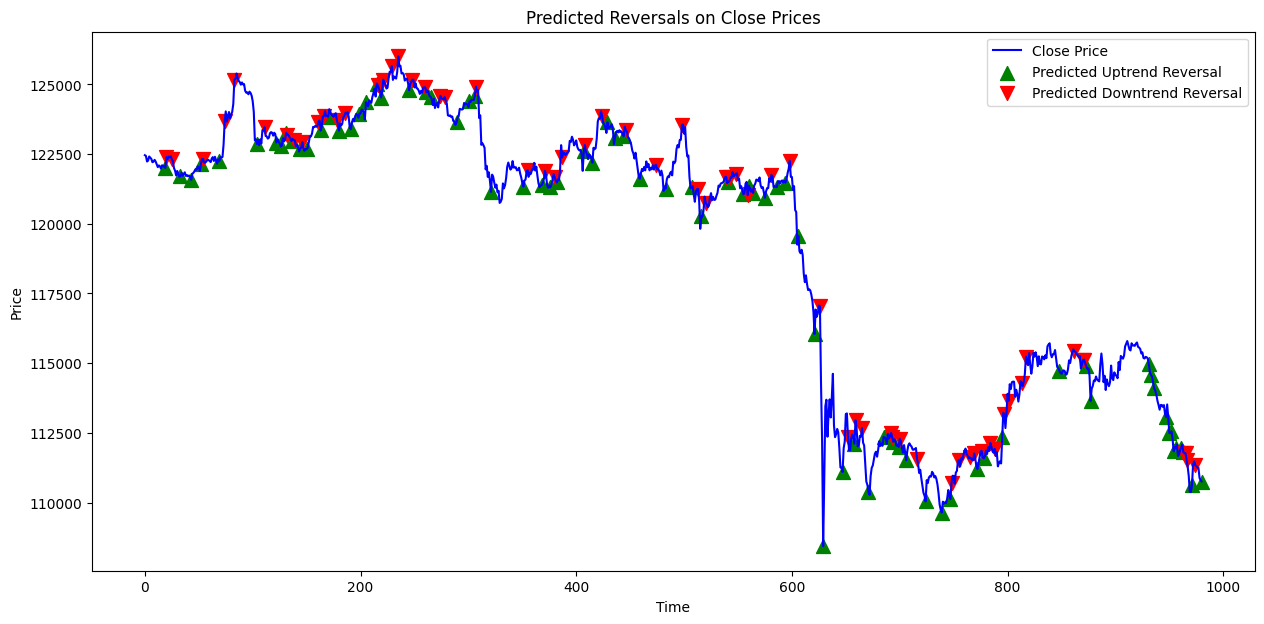

In [265]:
# ===============================
# 5. Plot Close prices with predicted reversals
# ===============================
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(df.index, df["close"], label="Close Price", color="blue")

# Uptrend reversals (label=2)
plt.scatter(df.index[df["Predicted"]==2], df["close"][df["Predicted"]==2],
            marker="^", color="green", s=100, label="Predicted Uptrend Reversal")

# Downtrend reversals (label=0)
plt.scatter(df.index[df["Predicted"]==0], df["close"][df["Predicted"]==0],
            marker="v", color="red", s=100, label="Predicted Downtrend Reversal")

plt.title("Predicted Reversals on Close Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()